In [45]:
# Initialization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


np.seterr(all='ignore')

# Constant
g = 9.8
n = 0
beta = 1

# grid and time step
dx = 0.5
dt = 0.07

time = 2
tout = 10

# Initial Condition and Dam properties
b = 1
h1 = 1.5
h2 = 1
lf = 55

# Grid
imax = int(lf/dx)
tmax = int(time/dt)

# Zeros array
Q = np.zeros(imax, dtype=np.float64)
z = np.zeros(imax, dtype=np.float64)
A = np.zeros(imax, dtype=np.float64)
R = np.zeros(imax, dtype=np.float64)
h = np.zeros(imax, dtype=np.float64)

# Initial Condition
for i in range(0, imax):
    if i <= imax/2:
        h[i]=h1
    else:
        h[i]=h2
    A[i] = b*h[i]

# Kondisi terhadap waktu
Ao = np.array(A, copy=True)
An = np.array(A, copy=True)
Qn = np.array(Q, copy=True)
Qo = np.array(Q, copy=True)

nan


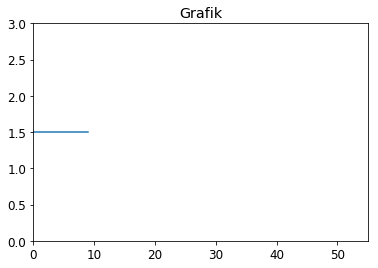

In [46]:
# Simulasi
# Pengulangan waktu
absis = np.linspace(0,lf,int(lf/dx))

#fig, ax = plt.subplots(1, figsize=(6,4))
for t in range(0, tmax):
    # Kontinuitas
    for i in range(1,imax-1):
        An[i] = Ao[i] - (dt/dx)*(Q[i+1]-Q[i-1])

    An[0] = An[1]
    An[-1] = An[-2]

    for i in range(1, imax-1):
        R[i] = A[i]/(b+2*(A[i]/b))
        I2 = beta * (((Q[i+1]**2/A[i+1]) - (Q[i-1]**2)/A[i-1])) / (2*dx)
        I3 = g * A[i] * ((h[i+1] + z[i+1]) - (h[i-1] + z[i-1])) / (2*dx)
        I4 = g * abs(Q[i]) * Q[i] * n**2 / (A[i] * R[i]**(4/3))
        Qn[i] = Qo[i] - (I2 + I3 +I4)*2*dt

    Qn[0] = Qn[1]
    Qn[-1] = Qn[-2]

    # Current -> Initial
    Ao = A
    Qo = Q
    # Next -> Current
    A = An
    Q = Qn

    for i in range(0,imax):
        h[i] = A[i]/b

def init():
    ax.set_ylim(0, 2)
    ax.set_xlim(0, lf)
    
    ax.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':12})
    
    return 

init()
#steps = 1    
#ani = FuncAnimation(fig, simulasi, steps, init_func=init, interval=50, blit=True)

print(h[30])

#plt.plot(absis,h);        
plt.title('Grafik')
plt.xlim(0,lf)
plt.ylim(0,3)
plt.plot(absis,h);

In [40]:
for i in range(0,1):
    print (i)

0
